In [88]:
import glob
import pandas as pd
import mne
import matplotlib.pyplot as plt
from io import StringIO
import mne
from mne.io import read_raw_eeglab, read_epochs_eeglab
import numpy as np
from scipy import signal
from scipy import fftpack
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from tqdm import tqdm, tqdm_notebook
import math

from sklearn import preprocessing
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from keras_tqdm import TQDMNotebookCallback
from tensorboard.plugins.hparams import api as hp
from livelossplot.tf_keras import PlotLossesCallback

import autosklearn.regression
import sklearn.model_selection
import sklearn.datasets
import sklearn.metrics
import multiprocessing
from tpot import TPOTRegressor
from oct2py import octave

from joblib import Parallel, delayed
import multiprocessing
from joblib import wrap_non_picklable_objects
import json
import pickle
import os.path
from mpl_toolkits.mplot3d import axes3d
import timeit
from skimage.transform import resize
from timeit import default_timer as timer
from datetime import timedelta
import json

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, optimizers, callbacks
from tensorflow.keras.models import Model, load_model
from tensorboard.plugins.hparams import api as hp
from tensorflow.keras.utils import plot_model

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.genmod import bayes_mixed_glm as glm

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFECV

from spectrum import arburg, arma2psd
import pylab

In [60]:
df = pd.read_excel('108-phase-powers-v2.xlsx')

In [11]:
df.shape

(1938, 921)

In [12]:
df.head()

,Unnamed: 0,AF3_beta_phase,AF3_beta_power,AF3_gamma_phase,AF3_gamma_power,AF3_high_beta_phase,AF3_high_beta_power,AF3_high_gamma_phase,AF3_high_gamma_power,AF3_low_beta_phase,...,cmap,exp,mep_by_cmap,mep_cat_abs,mep_cat_cmap,mep_cat_percentile,mep_size,run,sub,trial_num
0,0,1.428832,-57.824963,-0.711762,-66.336084,-2.342277,-58.995625,0.377453,-67.774819,-2.209596,...,0.00744,exp01,343.423853,1,1,1,2.555237,SP 110RMT r1,sub03,0
1,1,1.207595,-63.209878,1.089213,-69.298822,0.910096,-64.221493,1.235293,-71.342501,-1.770560,...,0.00744,exp01,120.175776,1,0,0,0.894165,SP 110RMT r1,sub03,1
2,2,-1.635179,-62.122791,0.898665,-63.363832,-1.725530,-63.198953,1.087354,-63.735303,-3.004190,...,0.00744,exp01,80.739322,1,0,0,0.600739,SP 110RMT r1,sub03,2
3,3,-3.062924,-57.084814,-1.673935,-61.405880,-2.197109,-59.052716,1.663156,-59.389577,-0.542549,...,0.00744,exp01,85.599629,1,0,0,0.636902,SP 110RMT r1,sub03,3
4,4,-2.133858,-53.955623,-1.092259,-61.044480,-2.306246,-54.808586,-0.396410,-62.453035,1.247554,...,0.00744,exp01,80.370125,1,0,0,0.597992,SP 110RMT r1,sub03,4


In [13]:
df.columns.values

array(['Unnamed: 0', 'AF3_beta_phase', 'AF3_beta_power',
       'AF3_gamma_phase', 'AF3_gamma_power', 'AF3_high_beta_phase',
       'AF3_high_beta_power', 'AF3_high_gamma_phase',
       'AF3_high_gamma_power', 'AF3_low_beta_phase', 'AF3_low_beta_power',
       'AF3_low_gamma_phase', 'AF3_low_gamma_power', 'AF3_mu_phase',
       'AF3_mu_power', 'AF4_beta_phase', 'AF4_beta_power',
       'AF4_gamma_phase', 'AF4_gamma_power', 'AF4_high_beta_phase',
       'AF4_high_beta_power', 'AF4_high_gamma_phase',
       'AF4_high_gamma_power', 'AF4_low_beta_phase', 'AF4_low_beta_power',
       'AF4_low_gamma_phase', 'AF4_low_gamma_power', 'AF4_mu_phase',
       'AF4_mu_power', 'AF7_beta_phase', 'AF7_beta_power',
       'AF7_gamma_phase', 'AF7_gamma_power', 'AF7_high_beta_phase',
       'AF7_high_beta_power', 'AF7_high_gamma_phase',
       'AF7_high_gamma_power', 'AF7_low_beta_phase', 'AF7_low_beta_power',
       'AF7_low_gamma_phase', 'AF7_low_gamma_power', 'AF7_mu_phase',
       'AF7_mu_power', 'AF8

In [22]:
for column in df.columns.values:
    print("prefix + '_" + column + "': row['" + column + "'],")

prefix + '_Unnamed: 0': row['Unnamed: 0'],
prefix + '_AF3_beta_phase': row['AF3_beta_phase'],
prefix + '_AF3_beta_power': row['AF3_beta_power'],
prefix + '_AF3_gamma_phase': row['AF3_gamma_phase'],
prefix + '_AF3_gamma_power': row['AF3_gamma_power'],
prefix + '_AF3_high_beta_phase': row['AF3_high_beta_phase'],
prefix + '_AF3_high_beta_power': row['AF3_high_beta_power'],
prefix + '_AF3_high_gamma_phase': row['AF3_high_gamma_phase'],
prefix + '_AF3_high_gamma_power': row['AF3_high_gamma_power'],
prefix + '_AF3_low_beta_phase': row['AF3_low_beta_phase'],
prefix + '_AF3_low_beta_power': row['AF3_low_beta_power'],
prefix + '_AF3_low_gamma_phase': row['AF3_low_gamma_phase'],
prefix + '_AF3_low_gamma_power': row['AF3_low_gamma_power'],
prefix + '_AF3_mu_phase': row['AF3_mu_phase'],
prefix + '_AF3_mu_power': row['AF3_mu_power'],
prefix + '_AF4_beta_phase': row['AF4_beta_phase'],
prefix + '_AF4_beta_power': row['AF4_beta_power'],
prefix + '_AF4_gamma_phase': row['AF4_gamma_phase'],
prefix + '_A

In [15]:
df2 = df[['C3_beta_phase', 'C3_beta_power', 'C3_gamma_phase',
       'C3_gamma_power', 'C3_high_beta_phase', 'C3_high_beta_power',
       'C3_high_gamma_phase', 'C3_high_gamma_power', 'C3_low_beta_phase',
       'C3_low_beta_power', 'C3_low_gamma_phase', 'C3_low_gamma_power',
       'C3_mu_phase', 'C3_mu_power', 'C4_beta_phase', 'C4_beta_power', 
       'mep_size', 'mep_cat_abs', 'mep_by_cmap', 'mep_cat_percentile', 'sub', 'exp', 'run', 'trial_num']]
df2.head()

,C3_beta_phase,C3_beta_power,C3_gamma_phase,C3_gamma_power,C3_high_beta_phase,C3_high_beta_power,C3_high_gamma_phase,C3_high_gamma_power,C3_low_beta_phase,C3_low_beta_power,...,C4_beta_phase,C4_beta_power,mep_size,mep_cat_abs,mep_by_cmap,mep_cat_percentile,sub,exp,run,trial_num
0,2.266883,-73.281603,1.487841,-84.914465,1.339672,-74.059672,0.872053,-85.837048,0.170396,-71.925775,...,-1.512636,-77.882881,2.555237,1,343.423853,1,sub03,exp01,SP 110RMT r1,0
1,2.910591,-61.937065,-2.048183,-72.608007,-3.064875,-63.252337,1.962030,-74.046689,-0.639314,-59.760585,...,-2.416476,-66.545586,0.894165,1,120.175776,0,sub03,exp01,SP 110RMT r1,1
2,1.032230,-46.328362,0.676769,-54.835294,0.987847,-47.053933,-1.728969,-57.527752,0.989854,-45.005872,...,0.320141,-55.441957,0.600739,1,80.739322,0,sub03,exp01,SP 110RMT r1,2
3,0.186384,-58.740863,0.966784,-70.110007,-0.595625,-60.591897,-0.617618,-71.898589,-1.690876,-55.757678,...,1.219035,-60.319203,0.636902,1,85.599629,0,sub03,exp01,SP 110RMT r1,3
4,1.178990,-47.207672,1.204826,-58.495016,1.342455,-49.567252,0.468785,-59.241775,-2.078631,-43.420708,...,-1.246829,-55.809136,0.597992,1,80.370125,0,sub03,exp01,SP 110RMT r1,4


In [43]:
sub_keys = ['sub', 'run', 'exp', 'trial_num', 'cmap', 'mep_by_cmap', 'mep_cat_abs',
       'mep_cat_cmap', 'mep_cat_percentile', 'mep_size']
mep_keys = ['run', 'exp', 'trial_num', 'cmap', 'mep_by_cmap', 'mep_cat_abs',
       'mep_cat_cmap', 'mep_cat_percentile', 'mep_size']
df_anova = []
for sub in tqdm_notebook(df2['sub'].unique()):
    small = []
    large = []
    for idx, row in df2[df2['sub'] == sub].iterrows():
        if (row['mep_cat_abs'] == 0):
            small.append(row)
        else:
            large.append(row)
    length = np.minimum(len(small), len(large))
    small = small[:length]
    large = large[:length]
    for i in range(length):
        el = {'sub': sub}
        for key, value in small[i].items():
            if key != 'sub':
                el['small_' + key] = value
        for key, value in large[i].items():
            if key != 'sub':
                el['large_' + key] = value
        df_anova.append(el)

In [44]:
df_anova = pd.DataFrame(df_anova)
df_anova.to_excel('110-anova-prep-c3.xlsx')

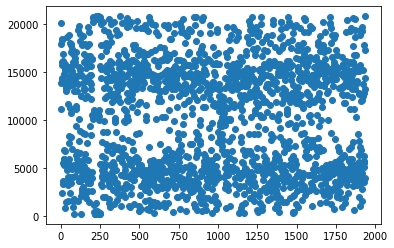

In [65]:
plt.plot(df['C3_beta_phase'] * 180 / math.pi + 180, 'o')

In [61]:
df2 = df
df2['C3_beta_phase'] = df2['C3_beta_phase'] * 180 / math.pi + 180
df3 = []
for idx, row in df2.iterrows():
    row2 = row
    if row['C3_beta_phase'] >= 45 and row['C3_beta_phase'] <= 135:
        row2['C3_beta_phase_cat'] = 0
    elif row['C3_beta_phase'] >= 225 and row['C3_beta_phase'] <= 315:
        row2['C3_beta_phase_cat'] = 1
    else:
        continue
    df3.append(row2)
df3 = pd.DataFrame(df3)
df3.head()

,Unnamed: 0,AF3_beta_phase,AF3_beta_power,AF3_gamma_phase,AF3_gamma_power,AF3_high_beta_phase,AF3_high_beta_power,AF3_high_gamma_phase,AF3_high_gamma_power,AF3_low_beta_phase,...,exp,mep_by_cmap,mep_cat_abs,mep_cat_cmap,mep_cat_percentile,mep_size,run,sub,trial_num,C3_beta_phase_cat
0,0,1.428832,-57.824963,-0.711762,-66.336084,-2.342277,-58.995625,0.377453,-67.774819,-2.209596,...,exp01,343.423853,1,1,1,2.555237,SP 110RMT r1,sub03,0,1
2,2,-1.635179,-62.122791,0.898665,-63.363832,-1.725530,-63.198953,1.087354,-63.735303,-3.004190,...,exp01,80.739322,1,0,0,0.600739,SP 110RMT r1,sub03,2,1
4,4,-2.133858,-53.955623,-1.092259,-61.044480,-2.306246,-54.808586,-0.396410,-62.453035,1.247554,...,exp01,80.370125,1,0,0,0.597992,SP 110RMT r1,sub03,4,1
5,5,-2.355690,-49.466871,-2.095349,-56.408464,-2.284538,-50.550414,-2.326376,-57.931681,0.573280,...,exp01,109.347571,1,0,0,0.813598,SP 110RMT r1,sub03,5,1
6,6,2.079737,-61.086632,-2.780294,-64.000207,1.745838,-62.778131,-2.754151,-61.654678,-0.165451,...,exp01,136.910189,1,0,0,1.018677,SP 110RMT r1,sub03,6,1


In [64]:
df3.shape

(1287, 922)

In [68]:
df_lmm = []
for sub in tqdm_notebook(df3['sub'].unique()):
    peaks = []
    troughs = []
    for idx, row in df3[df3['sub'] == sub].iterrows():
        if (row['C3_beta_phase_cat'] == 0):
            peaks.append(row)
        else:
            troughs.append(row)
    length = np.minimum(len(troughs), len(peaks))
    peaks = peaks[:length]
    troughs = troughs[:length]
    for i in range(length):
        el = {
            'sub': sub,
            'peak_exp': peaks[i]['exp'],
            'peak_run': peaks[i]['run'],
            'peak_trial': peaks[i]['trial_num'],
            'mep_size_at_peak': peaks[i]['mep_size'],
            'mep_by_cmap_at_peak': peaks[i]['mep_by_cmap'],
            'mep_cat_abs_at_peak': peaks[i]['mep_cat_abs'],
            'trough_exp': troughs[i]['exp'],
            'troug_run': troughs[i]['run'],
            'trough_trial': troughs[i]['trial_num'],
            'mep_size_at_trough': troughs[i]['mep_size'],
            'mep_by_cmap_at_trough': troughs[i]['mep_by_cmap'],
            'mep_cat_abs_at_trough': troughs[i]['mep_cat_abs'],
            
        }
        df_lmm.append(el)
df_lmm = pd.DataFrame(df_lmm)
df_lmm.head()

,mep_by_cmap_at_peak,mep_by_cmap_at_trough,mep_cat_abs_at_peak,mep_cat_abs_at_trough,mep_size_at_peak,mep_size_at_trough,peak_exp,peak_run,peak_trial,sub,troug_run,trough_exp,trough_trial
0,163.365216,343.423853,1,1,1.215515,2.555237,exp01,SP 110RMT r1,13,sub03,SP 110RMT r1,exp01,0
1,104.856326,80.739322,1,1,0.780181,0.600739,exp01,SP 110RMT r1,15,sub03,SP 110RMT r1,exp01,2
2,84.861370,80.370125,1,1,0.631409,0.597992,exp01,SP 110RMT r1,16,sub03,SP 110RMT r1,exp01,4
3,138.571238,109.347571,1,1,1.031036,0.813598,exp01,SP 110RMT r1,17,sub03,SP 110RMT r1,exp01,5
4,324.987264,136.910189,1,1,2.418060,1.018677,exp01,SP 110RMT r1,18,sub03,SP 110RMT r1,exp01,6


In [69]:
df_lmm.shape

(608, 13)

In [70]:
df_lmm.to_excel('110-lmm-c3.xlsx')

# Prepare for LMM

In [90]:
df = pd.read_excel('108-phase-powers-v3.xlsx')
df.head()

,Unnamed: 0,AF3_beta_phase,AF3_beta_phase_power,AF3_beta_phase_rad,AF3_beta_power,AF3_gamma_phase,AF3_gamma_phase_power,AF3_gamma_phase_rad,AF3_gamma_power,AF3_high_beta_phase,...,cmap,exp,mep_by_cmap,mep_cat_abs,mep_cat_cmap,mep_cat_percentile,mep_size,run,sub,trial_num
0,0,81.866065,-271232.615846,1.428832,-57.824963,-40.780971,154999.402721,-0.711762,-66.336084,-134.202606,...,0.00744,exp01,343.423853,1,1,1,2.555237,SP 110RMT r1,sub03,0
1,1,69.190100,-250582.962840,1.207595,-63.209878,62.407311,-247790.101290,1.089213,-69.298822,52.144665,...,0.00744,exp01,120.175776,1,0,0,0.894165,SP 110RMT r1,sub03,1
2,2,-93.688861,333473.669574,-1.635179,-62.122791,51.489712,-186932.379095,0.898665,-63.363832,-98.865572,...,0.00744,exp01,80.739322,1,0,0,0.600739,SP 110RMT r1,sub03,2
3,3,-175.492606,573986.984137,-3.062924,-57.084814,-95.909390,337437.790434,-1.673935,-61.405880,-125.885073,...,0.00744,exp01,85.599629,1,0,0,0.636902,SP 110RMT r1,sub03,3
4,4,-122.261058,377961.435208,-2.133858,-53.955623,-62.581853,218885.730920,-1.092259,-61.044480,-132.138158,...,0.00744,exp01,80.370125,1,0,0,0.597992,SP 110RMT r1,sub03,4


In [72]:
df['sub'].unique()

array(['sub03', 'sub04', 'sub05', 'sub06', 'sub07', 'sub08', 'sub09',
       'sub10', 'sub11', 'sub12', 'sub14', 'sub15', 'sub16'], dtype=object)

In [77]:
sub_count = {}
for sub in df['sub'].unique():
    sub_count[sub] = 0
df['repeat_count'] = df['Unnamed: 0']
for i in range(df.shape[0]):
    sub_count[df.at[i, 'sub']] = sub_count[df.at[i, 'sub']] + 1
    df.at[i, 'repeat_count'] = sub_count[df.iloc[i]['sub']]
df = df.drop('Unnamed: 0', axis=1)
df.head()

,AF3_beta_phase,AF3_beta_power,AF3_gamma_phase,AF3_gamma_power,AF3_high_beta_phase,AF3_high_beta_power,AF3_high_gamma_phase,AF3_high_gamma_power,AF3_low_beta_phase,AF3_low_beta_power,...,exp,mep_by_cmap,mep_cat_abs,mep_cat_cmap,mep_cat_percentile,mep_size,run,sub,trial_num,repeat_count
0,1.428832,-57.824963,-0.711762,-66.336084,-2.342277,-58.995625,0.377453,-67.774819,-2.209596,-55.856079,...,exp01,343.423853,1,1,1,2.555237,SP 110RMT r1,sub03,0,1
1,1.207595,-63.209878,1.089213,-69.298822,0.910096,-64.221493,1.235293,-71.342501,-1.770560,-61.463977,...,exp01,120.175776,1,0,0,0.894165,SP 110RMT r1,sub03,1,2
2,-1.635179,-62.122791,0.898665,-63.363832,-1.725530,-63.198953,1.087354,-63.735303,-3.004190,-60.278534,...,exp01,80.739322,1,0,0,0.600739,SP 110RMT r1,sub03,2,3
3,-3.062924,-57.084814,-1.673935,-61.405880,-2.197109,-59.052716,1.663156,-59.389577,-0.542549,-53.884461,...,exp01,85.599629,1,0,0,0.636902,SP 110RMT r1,sub03,3,4
4,-2.133858,-53.955623,-1.092259,-61.044480,-2.306246,-54.808586,-0.396410,-62.453035,1.247554,-52.453120,...,exp01,80.370125,1,0,0,0.597992,SP 110RMT r1,sub03,4,5


In [87]:
df.to_excel('110-lmm-c3.xlsx')